# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [10]:
from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
experiments = SHL_set({})

In [11]:
%%writefile {experiments.shl.data_cache}/{tag}.py

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'

from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, eta_homeo=0.01, alpha_homeo=0.7, verbose=0)
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']
variables = ['eta', 'alpha_homeo']
if command == 'run':
    for variable in variables:
        experiments.scan(variable=variable, list_figures=[], display='')

if command == 'plot':
    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic')
    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')
    list_figures = ['show_dico']
    display_variables = ['error', 'logL', 'cputime']
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable='eta', list_figures=[], display='')
        plt.show()

        for display_variable in display_variables:
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print(display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting data_cache/HAP.py


In [12]:
!ls -l {experiments.shl.data_cache}/{tag}*
!rm -fr {experiments.shl.data_cache}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  1575 Feb 23 16:04 data_cache/HAP.py


In [13]:
%run {experiments.shl.data_cache}/{tag}.py run

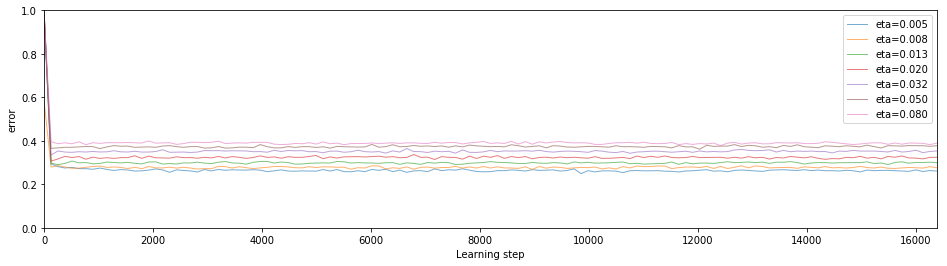

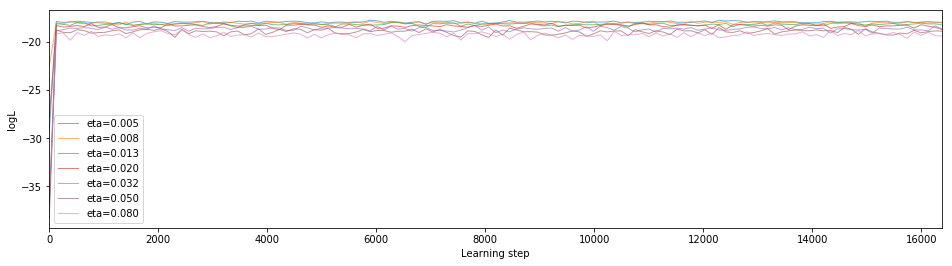

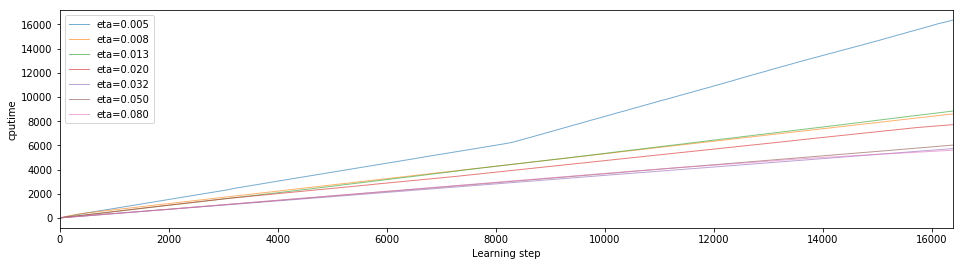

error


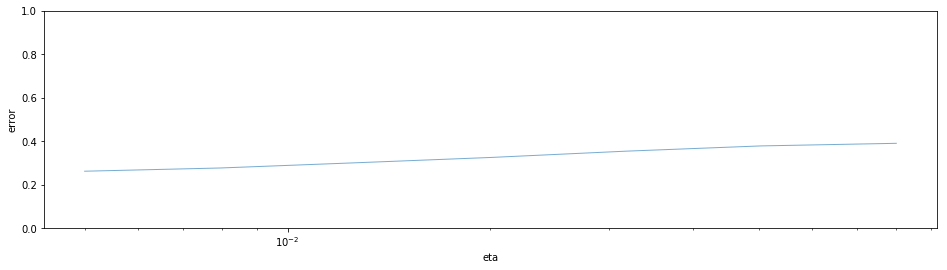

logL


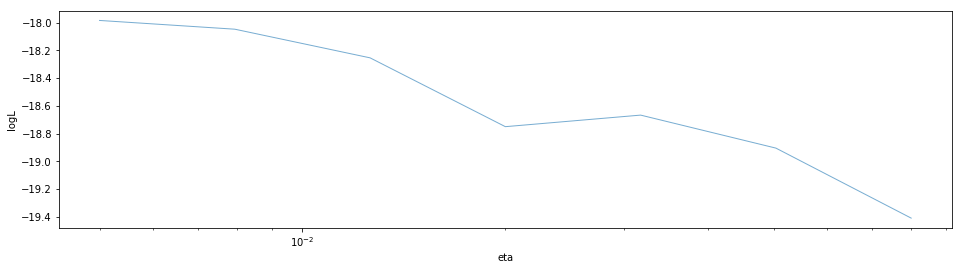

cputime


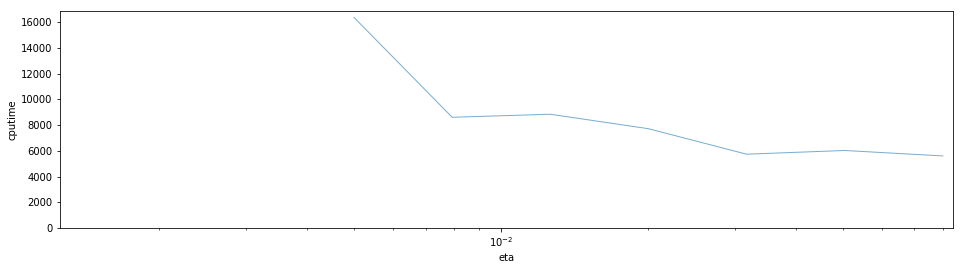

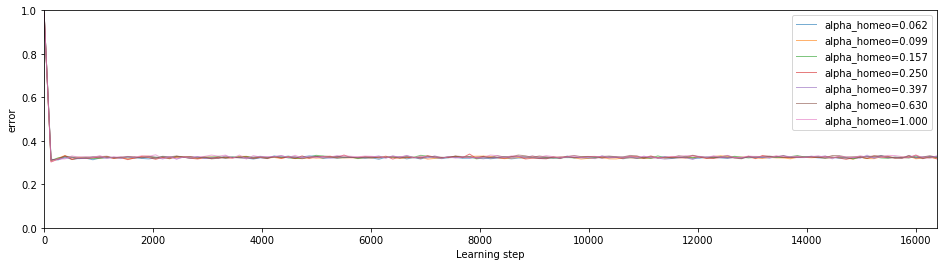

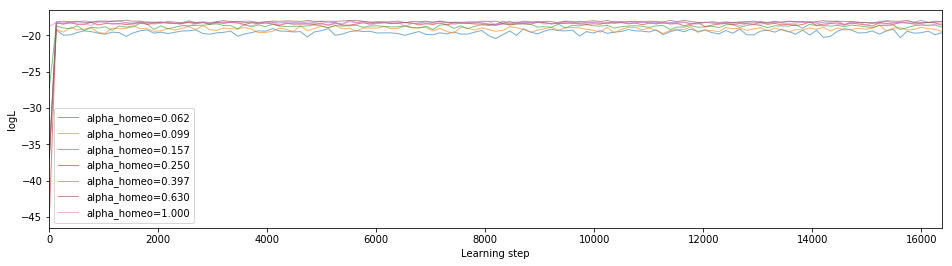

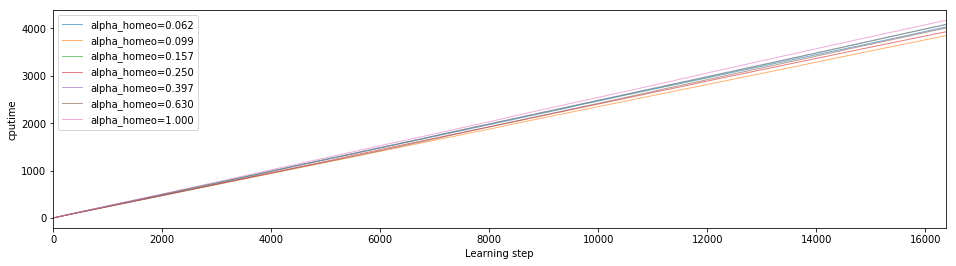

error


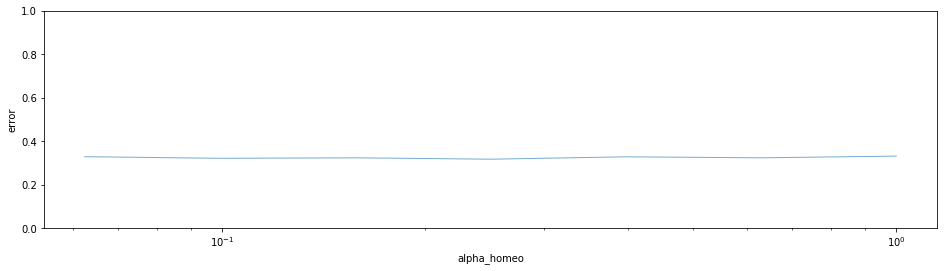

logL


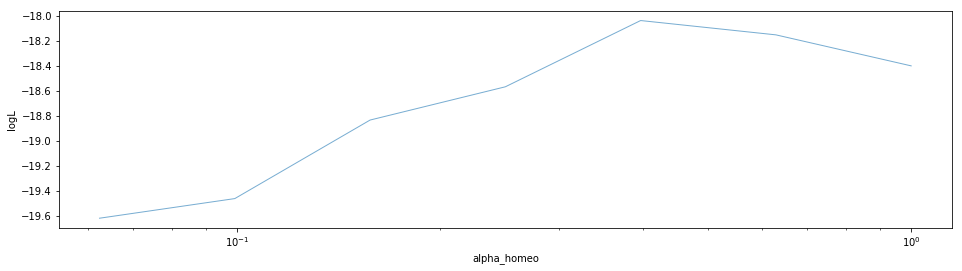

cputime


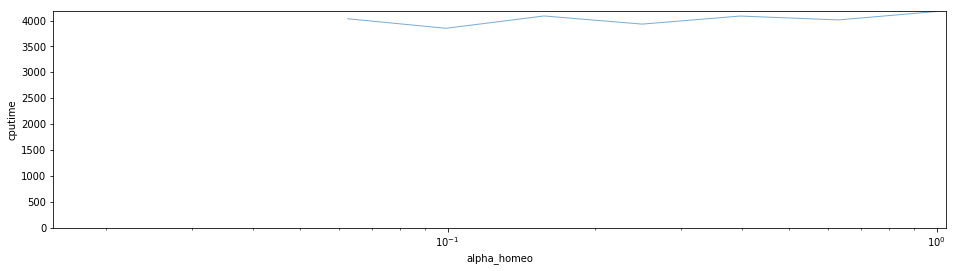

In [14]:
%run {experiments.shl.data_cache}/{tag}.py plot

## Version used

In [8]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
pandas 0.22.0
Fri Feb 23 16:01:06 2018 CET